# Chapter 3 - Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale, OneHotEncoder, PolynomialFeatures
import statsmodels.formula.api as smf
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Notebooks'

## 1. Analyze Data

### 1.1. Load *Advertising* dataset
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [2]:
advertising = pd.read_csv(f'{BASE_DIR}/Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## 2. Simple Linear Regression

### 2.1. Least Squares Fit / RSS

#### Figure 2.1. Least squares fit

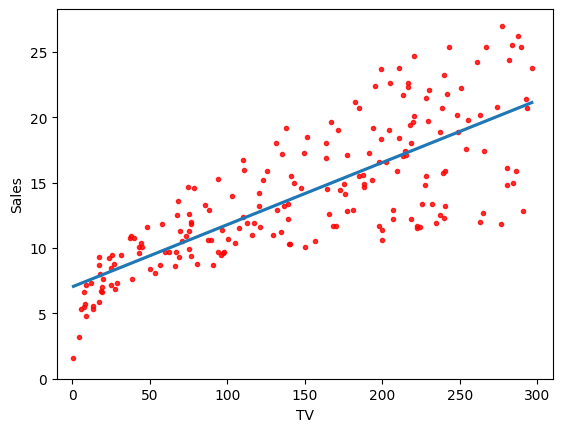

In [4]:
fig, ax = plt.subplots()

sns.regplot(x=advertising['TV'], y=advertising['Sales'], order=1, ci=None, scatter_kws={'color':'r', 's':9}, ax=ax)

ax.set_xlim(-10,310)
ax.set_ylim(ymin=0)

fig.show()

#### Figure 2.2. Regression coefficients - RSS (Residual Sum of Squares)
Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the B0 coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

In [5]:
# Regression coefficients (Ordinary Least Squares)
regr = LinearRegression()

# Scale (center the data before scaling & scale the data to unit variance if true)
X = scale(advertising['TV'], with_mean=True, with_std=False).reshape(-1,1)
Y = advertising['Sales']

regr.fit(X, Y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


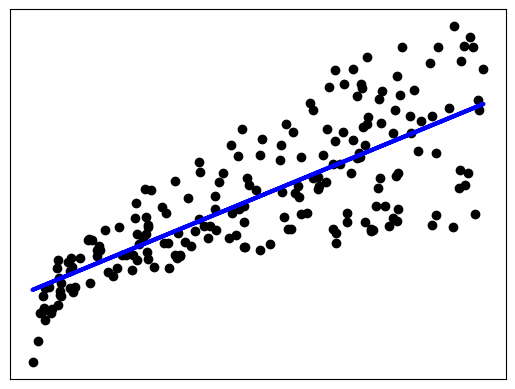

In [6]:
Y_pred = regr.predict(X)

# Plot outputs
fig, ax = plt.subplots()

ax.scatter(X, Y,  color='black')
ax.plot(X, Y_pred, color='blue', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
fig.show()

#### Calculate RSS
Calculate the rss between y & y_pred

In [7]:
np.sum((Y - Y_pred)**2)

2102.5305831313512

### 2.2. Exercise
Write your code in the cells below.

Follow the descriptions in Section 2.1 and plot a Linear Regression Graph & Calculate RSS

(X: Newspaper, y: Sales)

14.0225
[0.0546931]


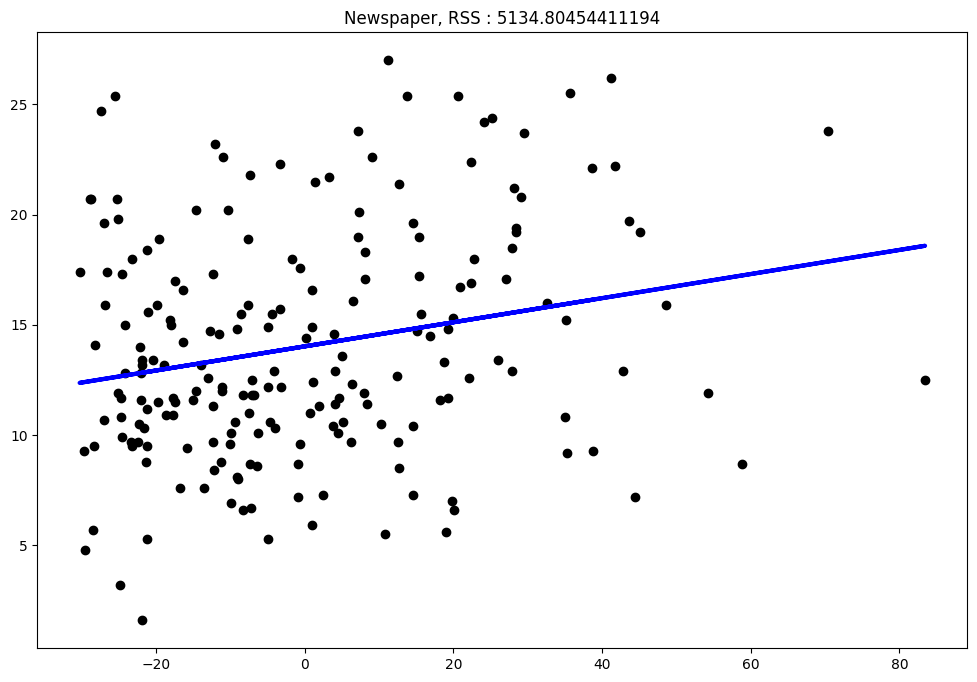

In [8]:
regr2 = LinearRegression()
X2 = scale(advertising['Newspaper'], with_mean=True, with_std=False).reshape(-1, 1)

# TODO: Train the model
regr2.fit(X2, Y)
print(regr2.intercept_)
print(regr2.coef_)

# TODO: Get the predicted values
Y_pred2 = regr2.predict(X2)

# TODO: Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X2, Y,  color='black')

# TODO: Plot the prediction line
ax.plot(X2, Y_pred2, color='blue', linewidth=3)

# TODO: Calculate RSS
rss = np.sum((Y - Y_pred2)**2)
ax.set_title(f'Newspaper, RSS : {rss}')
fig.show()

### 2.3. Grid plot
Let's see the rss of B0, B1 near the value that we found

In [9]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_ - 2, regr.intercept_ + 2, 50)
B1 = np.linspace(regr.coef_ - 0.02, regr.coef_ + 0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i,j] = np.sum((Y - (xx[i,j] + X.reshape(-1) * yy[i,j])) ** 2)

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_ + regr.coef_ * X - Y.values.reshape(-1,1)) ** 2)
print(min_rss)

2102.5305831313512


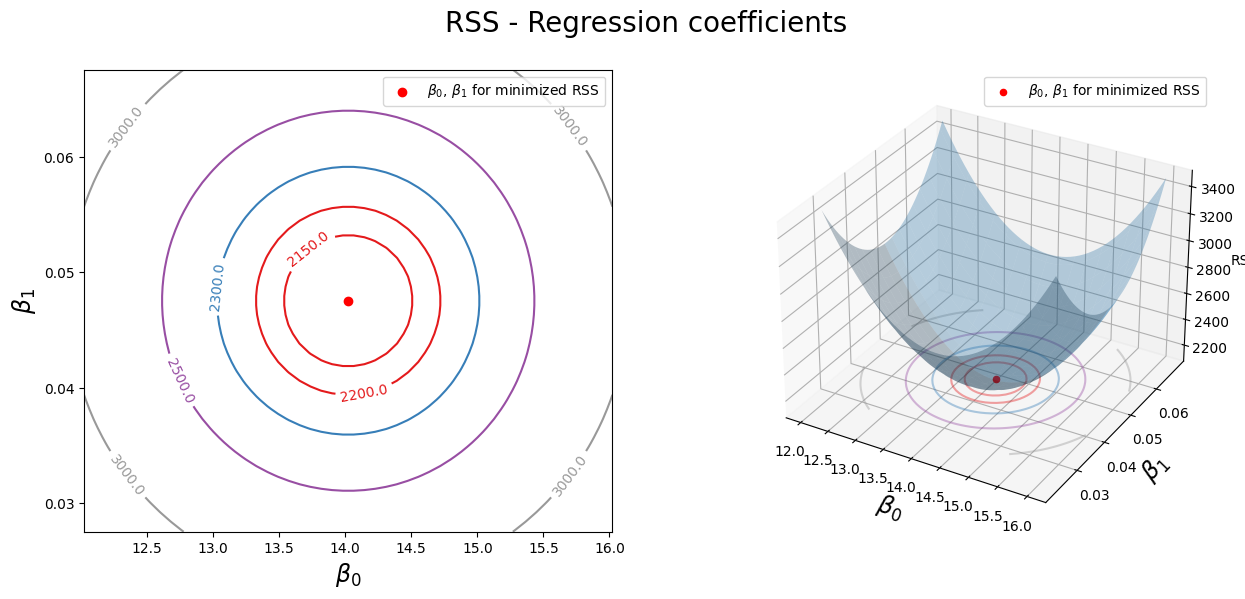

In [10]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.get_cmap('Set1'), levels=[2150, 2200, 2300, 2500, 3000])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.get_cmap('Set1'),
            alpha=0.4, levels=[2150, 2200, 2300, 2500, 3000])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

fig.show()

### 2.4. T value & Table - Statsmodels

In [11]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [12]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [13]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


## 3. Multiple Linear Regression

#### Table 3.1 Statsmodels

In [14]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        14:55:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Table 3.2 Statsmodels

In [15]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### 3.1. Compare t value of TV,Radio and Newpaper with fitness below
Plot the resulting regression line and a 95% confidence interval

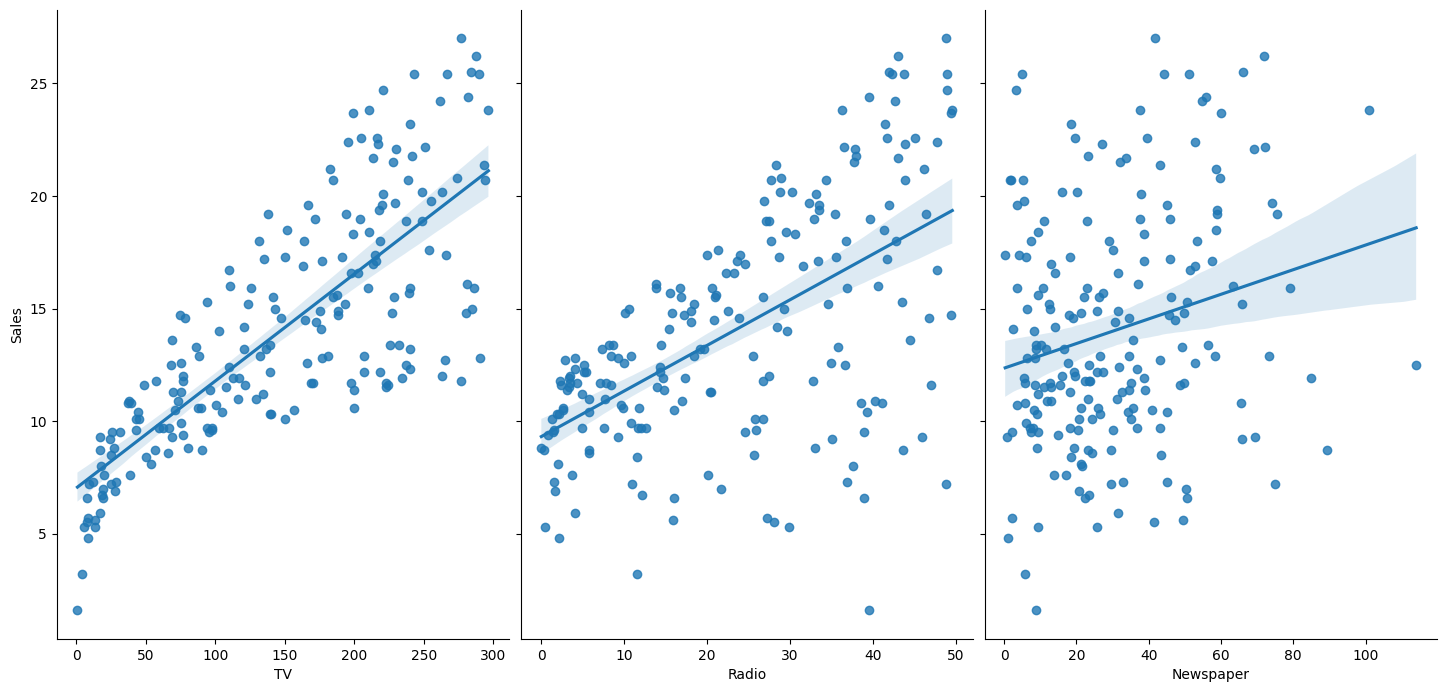

In [16]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [17]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        14:55:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.2. Multiple Linear Regression

In [18]:
regr = LinearRegression()

X = advertising[['Radio', 'TV']]
Y = advertising['Sales']

regr.fit(X, Y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [19]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


### Figure 3.1 Plot 3D data

In [20]:
# Create a coordinate grid
Radio = np.arange(0, 50)
TV = np.arange(0, 300)

B1, B2 = np.meshgrid(Radio, TV, indexing='ij')
Z = np.zeros((Radio.size, TV.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j] * regr.coef_[0] + B2[i,j] * regr.coef_[1])

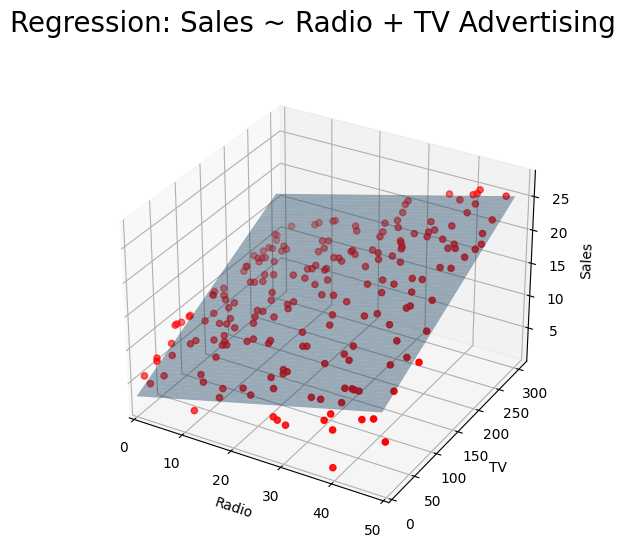

In [21]:
# Create plot
fig, ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': '3d'})
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising['Radio'], advertising['TV'], advertising['Sales'], c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')
fig.show()

In [22]:
regr = LinearRegression()

X = advertising[['Radio', 'TV', 'Newspaper']]
Y = advertising['Sales']

regr.fit(X, Y)
print(regr.coef_)
print(regr.intercept_)

advertising[['Radio', 'TV', 'Newspaper']].describe()

[ 0.18853002  0.04576465 -0.00103749]
2.9388893694594067


,Radio,TV,Newspaper
count,200.000000,200.000000,200.000000
mean,23.264000,147.042500,30.554000
std,14.846809,85.854236,21.778621
min,0.000000,0.700000,0.300000
25%,9.975000,74.375000,12.750000
50%,22.900000,149.750000,25.750000
75%,36.525000,218.825000,45.100000
max,49.600000,296.400000,114.000000


### 3.3. Exercise
Follow below descriptions to analyze Credit data (X : Age, Income Y: Balance)
Load f'{BASE_DIR}/Data/Credit.csv' data with pd.read_csv() methodFit multiple linear regressionDescribe data to set up the grid valuesCreate plot using plt.axes(projection='3d') (Figure 3.1)

In [23]:
# Load f'{BASE_DIR}/Data/Credit.csv' data with pd.read_csv() method
credit = pd.read_csv(f'{BASE_DIR}/Data/Credit.csv', usecols=list(range(1,12)))

X = credit[['Age', 'Income']]
Y = credit['Balance']

In [24]:
# Fit multiple linear regression (X: Age, Income Y: Balance)
regr.fit(X, Y)
print(regr.coef_)
print(regr.intercept_)

[-2.18506745  6.23587908]
359.67274306126217


In [25]:
# Describe data to set up the grid values
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
credit[['Age', 'Income']].describe()

,Age,Income
count,400.000000,400.000000
mean,55.667500,45.218885
std,17.249807,35.244273
min,23.000000,10.354000
25%,41.750000,21.007250
50%,56.000000,33.115500
75%,70.000000,57.470750
max,98.000000,186.634000


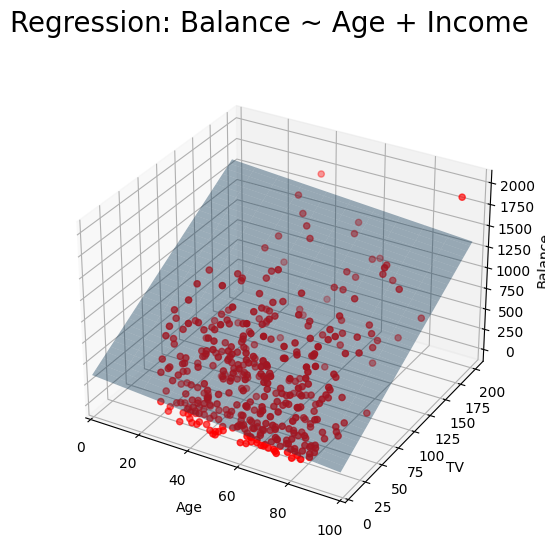

In [26]:
# Create plot using plt.axes(projection='3d')

# Create a coordinate grid
age = np.arange(0, 100)
income = np.arange(0, 200)

B1, B2 = np.meshgrid(age, income, indexing='ij')
Z = np.zeros((age.size, income.size))

for (i, j), v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j] * regr.coef_[0] + B2[i,j] * regr.coef_[1])

# Create plot
fig, ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': '3d'})
fig.suptitle('Regression: Balance ~ Age + Income', fontsize=20)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(credit.Age, credit.Income, credit.Balance, c='r')

ax.set_xlabel('Age')
ax.set_xlim(0,100)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Balance')
fig.show()

## 4. Other Considerations in the Regression Model

### 4.1. Qantative variables & Interaction term

#### Load Credit Dataset

In [27]:
credit = pd.read_csv(f'{BASE_DIR}/Data/Credit.csv', usecols=list(range(1, 12)))
credit['Student2'] = credit['Student'].map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


#### Figure 4.1 Pair plot

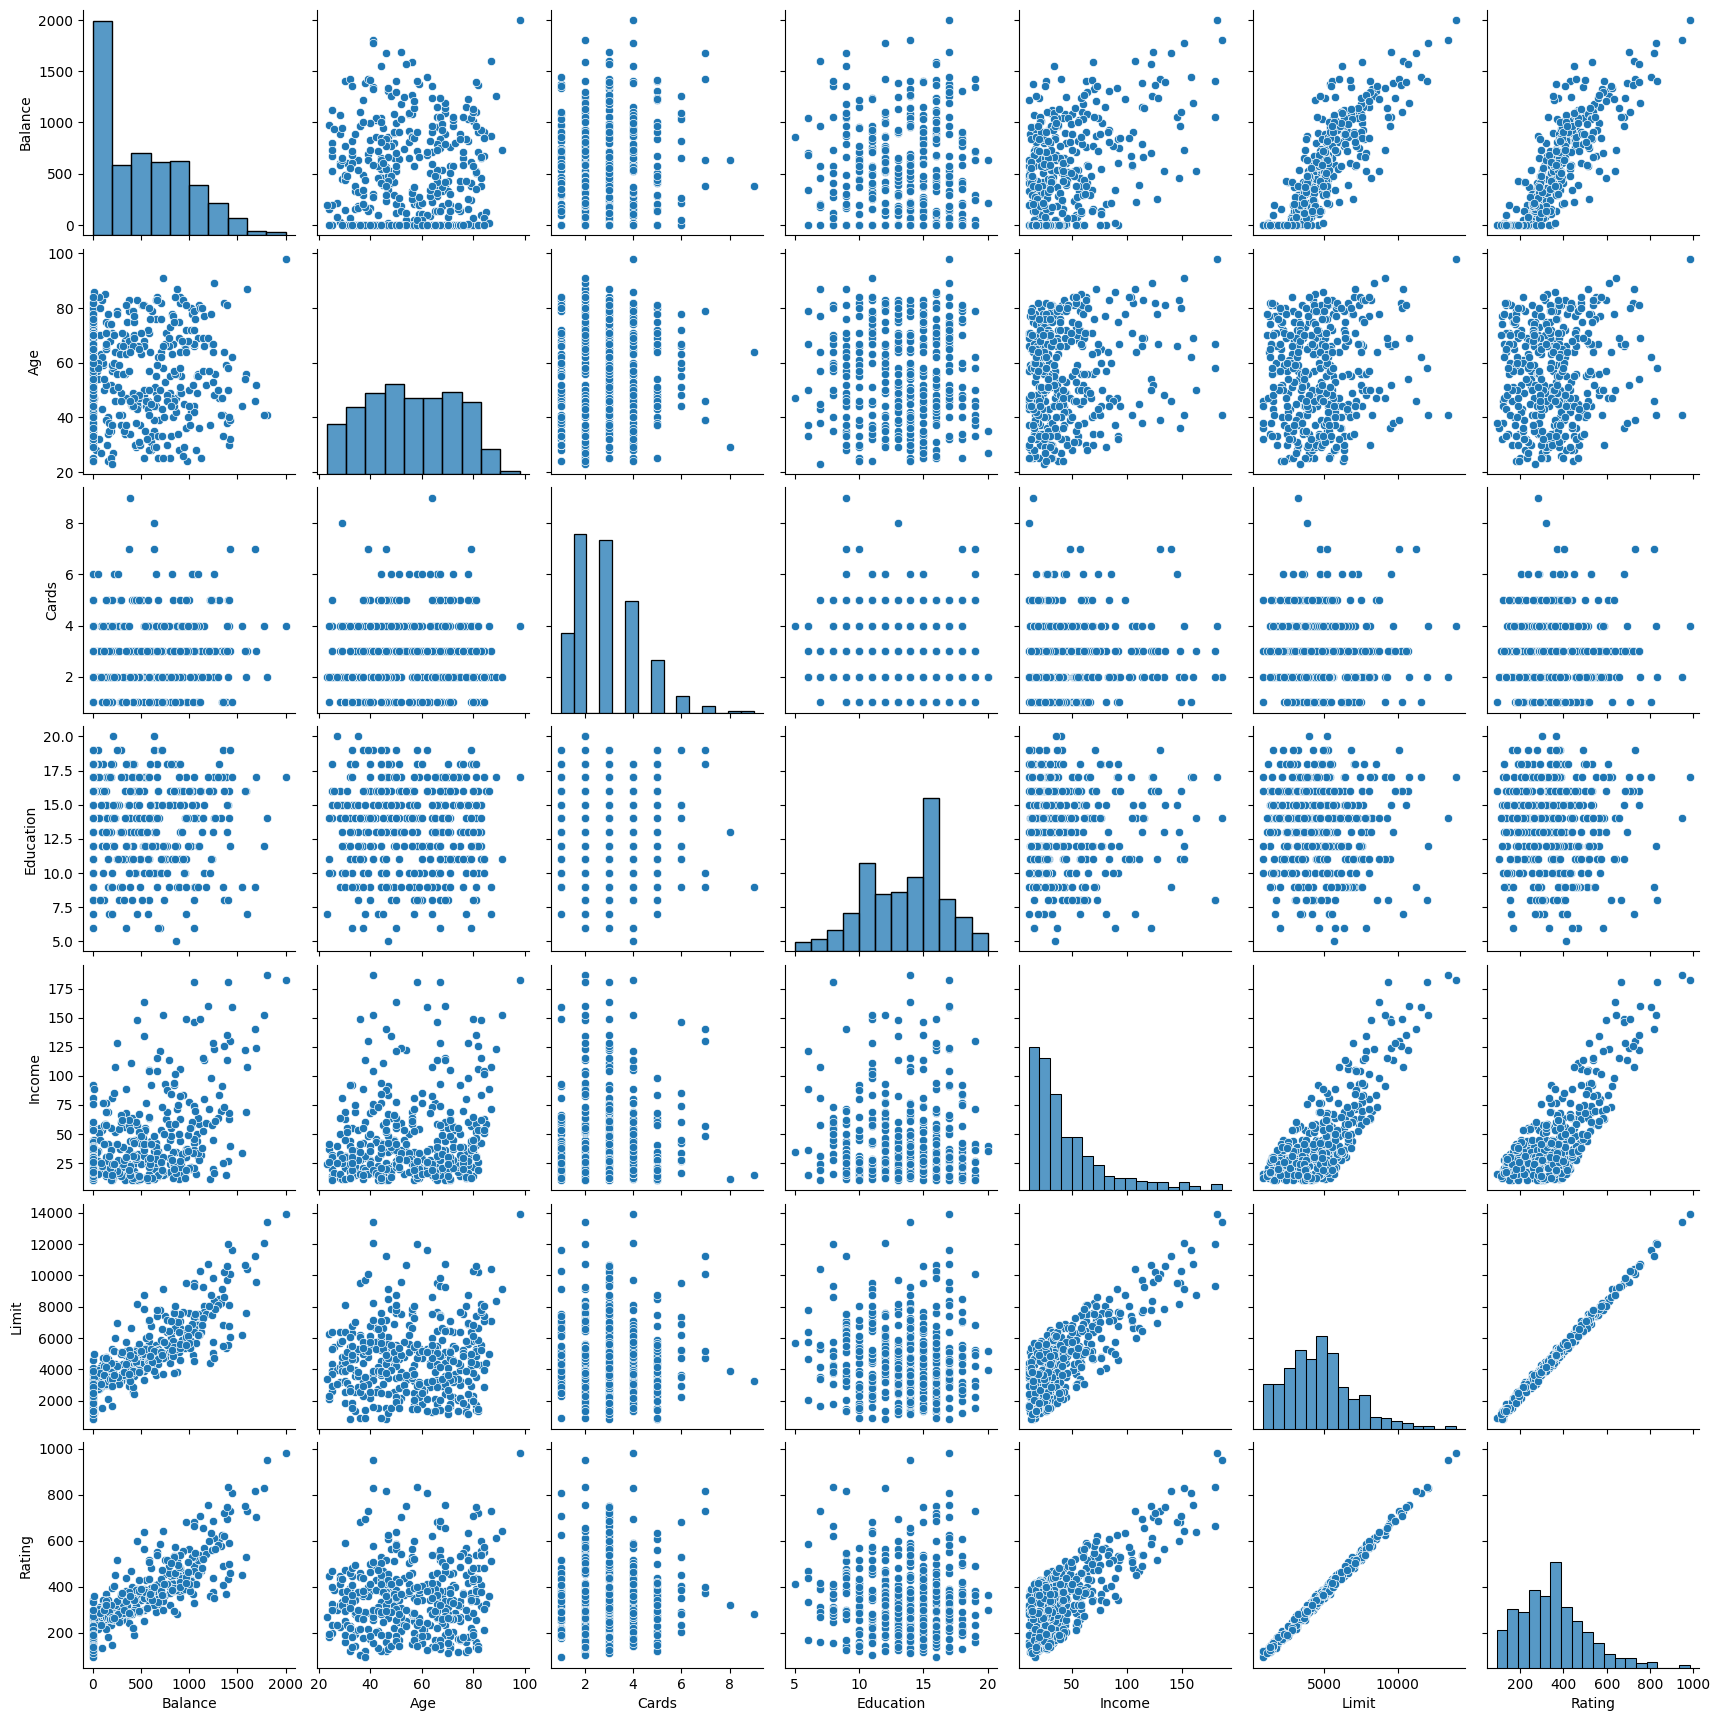

In [28]:
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']])

#### Table 4.1
Least squares coefficient estimates associated with the regression of
balance onto gender in the Credit data set.
Gender is encoded as a dummy variable.

In [29]:
print(credit['Gender'].unique())
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

[' Male' 'Female']


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


#### Table 4.2
Least squares coefficient estimates associated with the regression
of balance onto ethnicity in the Credit data set.
Ethnicity is encoded via two dummy variables

In [30]:
print(credit['Ethnicity'].unique())
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

['Caucasian' 'Asian' 'African American']


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### 4.2. OneHotEncoding - Quantative variables using sklearn

In [31]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [32]:
categorical_cols = ['Ethnicity', 'Gender', 'Student', 'Married']
X_categorical = credit[categorical_cols]
X_numerical = credit.drop(categorical_cols, axis=1).astype('float64')
X_categorical.head()

,Ethnicity,Gender,Student,Married
0,Caucasian,Male,No,Yes
1,Asian,Female,Yes,Yes
2,Asian,Male,No,No
3,Asian,Female,No,No
4,Caucasian,Male,No,Yes


In [33]:
enc = OneHotEncoder()
enc.fit(X_categorical)
print(enc.transform(X_categorical).toarray()[10:15])

[[0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1. 0.]]


In [34]:
X_concat = np.concatenate([X_numerical, enc.transform(X_categorical).toarray()], 1)
Y = credit['Balance']

print(X.shape, enc.transform(X_categorical).shape, X_concat.shape)

(400, 2) (400, 9) (400, 17)


#### Table 4.3 Interaction Variables
For the Advertising data, least squares coefficient estimates associated with the regression of sales onto TV and radio, with an interaction term

In [35]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


#### Figure 4.2 Interaction between qualitative and quantative variables

In [36]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


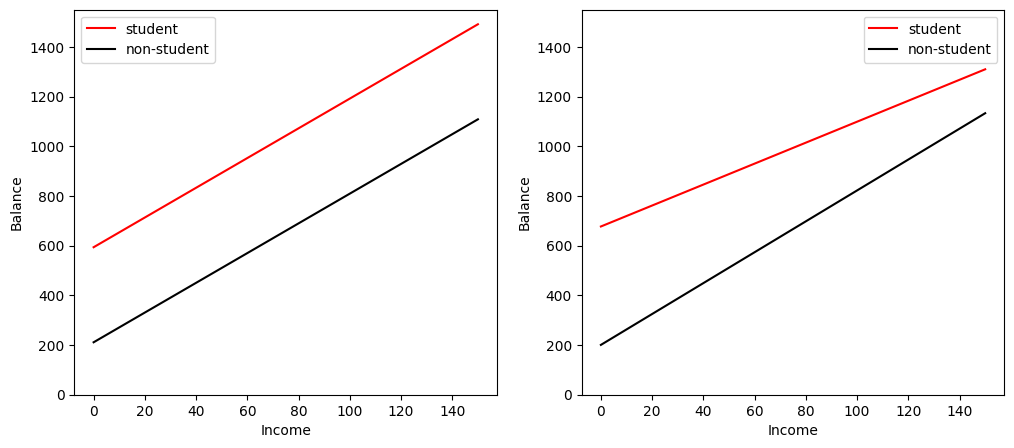

In [37]:
# Income (x-axis)
income = np.linspace(0, 150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept'] + regr1['Student2'],
                       regr1['Intercept'] + regr1['Student2'] + 150 * regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept'] + 150 * regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept'] + regr2['Student2'],
                       regr2['Intercept'] + regr2['Student2']+
                       150 * (regr2['Income'] + regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept'] + 150 * regr2['Income'])

# Create plot
fig, axes = plt.subplots(1,2, figsize=(12,5))
ax1, ax2 = axes
ax1.plot(income, student1, 'r', label='student')
ax1.plot(income, non_student1, 'k', label='non-student')
ax2.plot(income, student2, 'r', label='student')
ax2.plot(income, non_student2, 'k', label='non-student')

for ax in axes:
    ax.legend()
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim((0, 1550))
fig.show()

### 4.3. Non-linear relationships

#### Load Automobile Dataset

In [38]:
auto = pd.read_csv(f'{BASE_DIR}/Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [39]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### Figure 3.4 Non-linear relationships

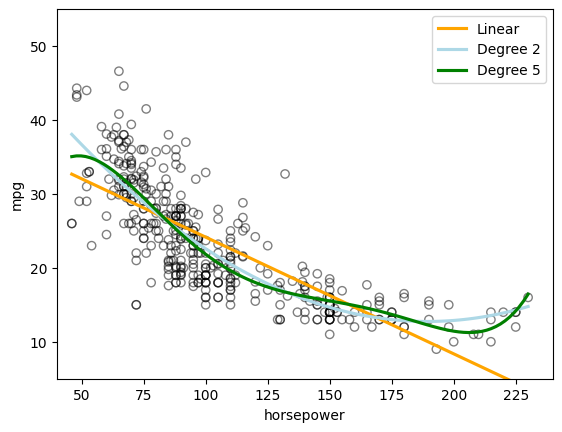

In [40]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
fig, ax = plt.subplots()

ax.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear', scatter=False, color='orange', ax=ax)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue', ax=ax)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g', ax=ax)

ax.legend()
ax.set_ylim(5,55)
ax.set_xlim(40,240)
fig.show()

#### Figure 3.5

In [41]:
auto['horsepower2'] = auto['horsepower'] ** 2
auto['h:c'] = auto['horsepower'] * auto['cylinders']

# Linear fit
regr = LinearRegression()
X = auto[['horsepower']]
Y = auto['mpg']
regr.fit(X, Y)

auto['pred1'] = regr.predict(X)
auto['residual1'] = auto['mpg'] - auto['pred1']

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].values
regr.fit(X2, Y)

auto['pred2'] = regr.predict(X2)
auto['residual2'] = auto['mpg'] - auto['pred2']

In [42]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,h:c,pred1,residual1,pred2,residual2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,1040.0,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,1320.0,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,1200.0,16.259151,1.740849,14.658717,3.341283
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0,1200.0,16.259151,-0.259151,14.658717,1.341283
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0,1120.0,17.837598,-0.837598,15.752059,1.247941


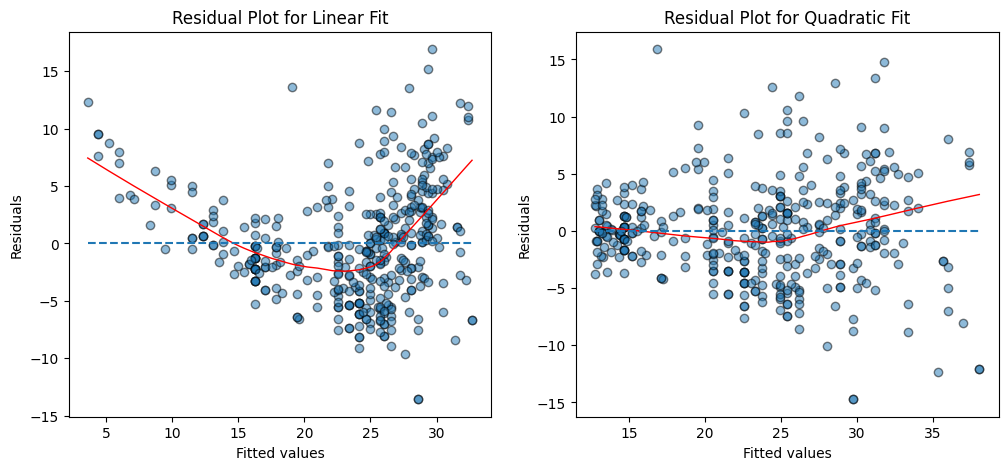

In [43]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
ax1, ax2 = axes

line_kws = {
    'color': 'r',
    'lw': 1,
}
scatter_kws = {
    'facecolors': None,
    'edgecolors': 'k',
    'alpha':0.5,
}

# Left plot
sns.regplot(x=auto['pred1'], y=auto['residual1'], lowess=True,
            line_kws=line_kws, scatter_kws=scatter_kws, ax=ax1)
ax1.hlines(0, xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1], linestyles='--')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(x=auto['pred2'], y=auto['residual2'], lowess=True,
            line_kws=line_kws, scatter_kws=scatter_kws, ax=ax2)
ax2.hlines(0, xmin=ax2.xaxis.get_data_interval()[0], xmax=ax2.xaxis.get_data_interval()[1], linestyles='--')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
fig.show()

### 4.4. PolynomialFeatures - Generate interaction term / polynomial features using sklearn

In [44]:
X = auto[['weight', 'acceleration']]
X.head()

,weight,acceleration
0,3504,12.0
1,3693,11.5
2,3436,11.0
3,3433,12.0
4,3449,10.5


In [45]:
poly = PolynomialFeatures(2)
print(poly.fit_transform(X)[:3])  # 1, horsepower, weight, horsepower^2, horsepower*weight, weight^2

[[1.0000000e+00 3.5040000e+03 1.2000000e+01 1.2278016e+07 4.2048000e+04
  1.4400000e+02]
 [1.0000000e+00 3.6930000e+03 1.1500000e+01 1.3638249e+07 4.2469500e+04
  1.3225000e+02]
 [1.0000000e+00 3.4360000e+03 1.1000000e+01 1.1806096e+07 3.7796000e+04
  1.2100000e+02]]


In [46]:
poly_interaction = PolynomialFeatures(interaction_only=True)
poly_interaction.fit_transform(X)
print(poly_interaction.fit_transform(X)[:3])  # 1, horsepower, weight, horsepower*weight

[[1.00000e+00 3.50400e+03 1.20000e+01 4.20480e+04]
 [1.00000e+00 3.69300e+03 1.15000e+01 4.24695e+04]
 [1.00000e+00 3.43600e+03 1.10000e+01 3.77960e+04]]


### 4.5. Exercise

Follow below descriptions to analyze Hitters data (X: Hits, HmRun, League Y: Salary)

1. Load f'{BASE_DIR}/Data/Hitters.csv' data with pd.read_csv() method
2. Use PolynomialFeatures to generate interaction term / polynomical features for plotting
3. Use OneHotEncoder to add categorical feature (origin)
4. Plot residuals (Follow steps in Figure 3.5) with default features / interaction terms / second order polynomial features / high-order polynomial features

In [47]:
# TODO: Load f'{BASE_DIR}/Data/Hitters.csv' data with pd.read_csv() method
hitters = pd.read_csv(f'{BASE_DIR}/Data/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [48]:
# TODO: Use OneHotEncoder to add categorical feature
categorical_cols = ['League']

X2 = hitters[categorical_cols]

enc = OneHotEncoder()
enc.fit(X2)
print(enc.transform(X2).toarray()[:5])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [49]:
# TODO: Use PolynomialFeatures to generate interaction term / polynomical features for plotting
X = hitters[['Hits', 'HmRun']]
print('X')
print(X[:5])
print()

poly = PolynomialFeatures(2)
print('PolynomialFeatures(2)')
print(poly.fit_transform(X)[:5])  # 1, hits, hmrun, hits^2, hits * hmrun, hmrun^2
print()

poly_interaction = PolynomialFeatures(2, interaction_only=True)
print('PolynomialFeatures(2, interaction_only=True)')
print(poly_interaction.fit_transform(X)[:5])  # 1, hits, hmrun, hits * hmrun
print()

poly_high = PolynomialFeatures(3)
print('PolynomialFeatures(3)')
print(poly_high.fit_transform(X)[:5])  # 1, hits, hmrun, hits * hmrun
print()

X
                   Hits  HmRun
Player                        
-Alan Ashby          81      7
-Alvin Davis        130     18
-Andre Dawson       141     20
-Andres Galarraga    87     10
-Alfredo Griffin    169      4

PolynomialFeatures(2)
[[1.0000e+00 8.1000e+01 7.0000e+00 6.5610e+03 5.6700e+02 4.9000e+01]
 [1.0000e+00 1.3000e+02 1.8000e+01 1.6900e+04 2.3400e+03 3.2400e+02]
 [1.0000e+00 1.4100e+02 2.0000e+01 1.9881e+04 2.8200e+03 4.0000e+02]
 [1.0000e+00 8.7000e+01 1.0000e+01 7.5690e+03 8.7000e+02 1.0000e+02]
 [1.0000e+00 1.6900e+02 4.0000e+00 2.8561e+04 6.7600e+02 1.6000e+01]]

PolynomialFeatures(2, interaction_only=True)
[[1.00e+00 8.10e+01 7.00e+00 5.67e+02]
 [1.00e+00 1.30e+02 1.80e+01 2.34e+03]
 [1.00e+00 1.41e+02 2.00e+01 2.82e+03]
 [1.00e+00 8.70e+01 1.00e+01 8.70e+02]
 [1.00e+00 1.69e+02 4.00e+00 6.76e+02]]

PolynomialFeatures(3)
[[1.000000e+00 8.100000e+01 7.000000e+00 6.561000e+03 5.670000e+02
  4.900000e+01 5.314410e+05 4.592700e+04 3.969000e+03 3.430000e+02]
 [1.000000e+

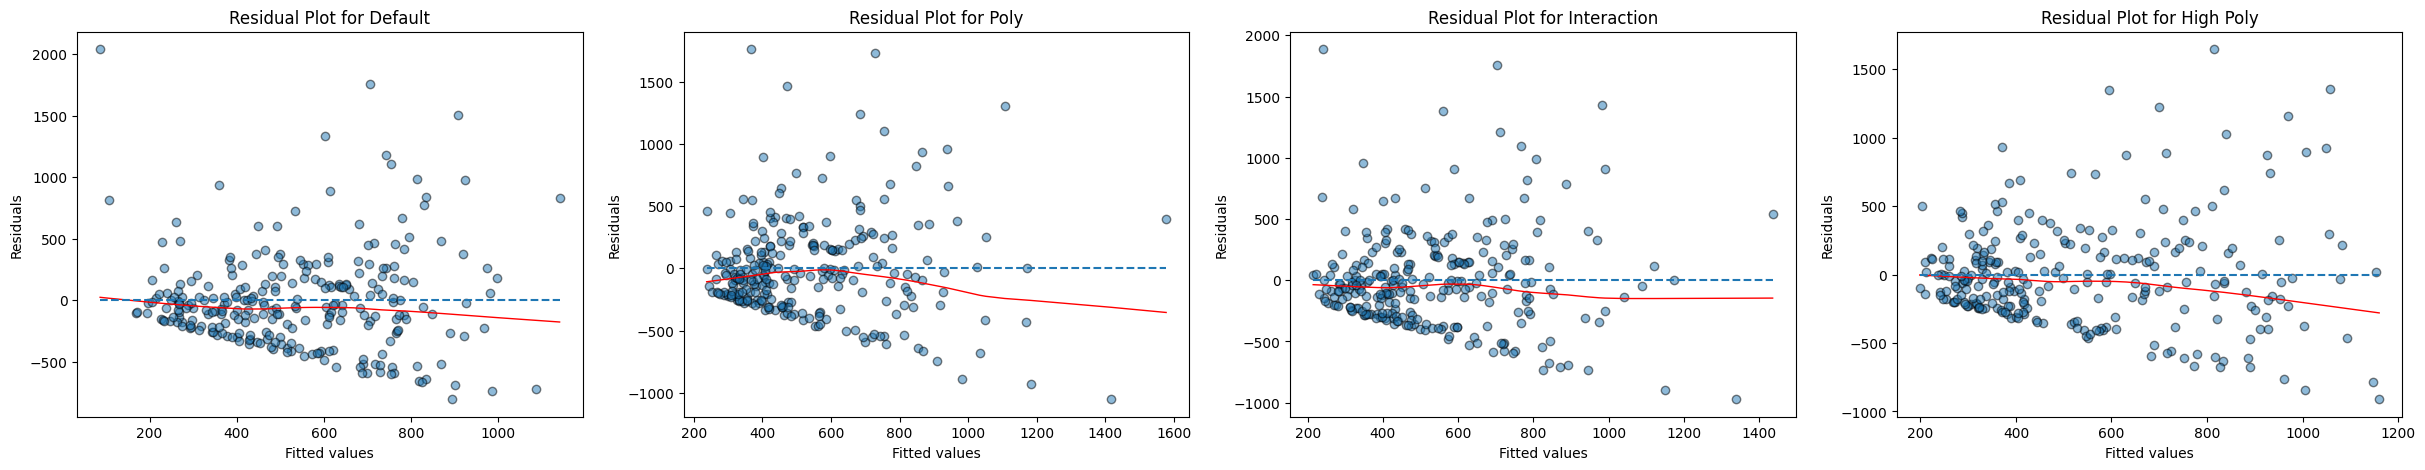

In [50]:
Xs = {
    'Default':     np.hstack([X, enc.transform(X2).toarray()]),
    'Poly':        np.hstack([poly.fit_transform(X), enc.transform(X2).toarray()]),
    'Interaction': np.hstack([poly_interaction.fit_transform(X), enc.transform(X2).toarray()]),
    'High Poly':   np.hstack([poly_high.fit_transform(X), enc.transform(X2).toarray()]),
}
Y = hitters['Salary']

# Fit LinearRegression and plot residuals (Follow steps in Figure 3.5)
# with default features / interaction terms / second order polynomial features / high-order polynomial features
fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for ax, (name, X) in zip(axes, Xs.items()):
  # Fit LinearRegression
  regr = LinearRegression()
  regr.fit(X, Y)

  # Left plot
  sns.regplot(x=regr.predict(X), y=Y - regr.predict(X), lowess=True,
              line_kws=line_kws, scatter_kws=scatter_kws, ax=ax)
  ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='--')
  ax.set_title(f'Residual Plot for {name}')

for ax in axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
fig.show()